## K均值算法

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
iris = pd.read_table('iris.txt',header=None,sep=',')
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
'''
函数功能：欧式距离计算公式
'''
def disEclud(vecA,vecB):
    return np.sum(np.power(vecA - vecB,2),axis=1)

In [84]:
def randCent(df,k):
    n = df.shape[1]
    # 特征值列
    data_min = df.iloc[:,:n-1].min()
    data_max = df.iloc[:,:n-1].max()
    # 随机制定k个质心
    return np.random.uniform(data_min,data_max,(k,n-1))

In [85]:
randCent(iris,3)

array([[5.58915063, 3.98436402, 3.29489124, 1.06084396],
       [5.67419698, 4.39922327, 4.03826376, 0.13181341],
       [5.75501059, 2.39571629, 3.69410284, 0.71383615]])

创建k个点作为初始质心
当任意一个点的簇分配结果发生改变时：
    对于每个点，找到它最接近的质心
    将质心更新为其最近数据点的平均值。我们移动质心，让其真正位于群集的中心位置

In [89]:
'''
函数功能:
    k 均值聚类
输入： 
    df：数据集
    k:聚类簇的个数
    distMet：距离计算公式

'''
def kmeans(df,k,distMet=disEclud,createCent=randCent):
    m,n = df.shape
    #初始化质心
    centroids  = createCent(df,k)
    #序列数据存储
    clusterAssment = np.zeros((m,3))
    clusterAssment[:,0] = np.inf
    clusterAssment[:,1:3] = -1
    # 数据拼接
    result_set = pd.concat([df,pd.DataFrame(clusterAssment)],axis=1,ignore_index=True)
    # 标志位
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            dist = distMet(df.iloc[i, :n-1].values,centroids)
            # 当前距离最小值
            result_set.iloc[i,-3] = dist.min()
            # 当前聚类结果 索引
            result_set.iloc[i,-2] = np.where(dist == dist.min())[0]
        # 所有点的分类全部不变，才能代表 质心 没有改变
        clusterChanged = not(result_set.iloc[:,-1] == result_set.iloc[:,-2]).all()

        if clusterChanged:
            # 更新质心
            cent_df = result_set.groupby(n+1).mean()
            centroids = cent_df.iloc[:,:n-1].values
            result_set.iloc[:,-1] = result_set.iloc[:,-2]
    return centroids,result_set

In [91]:
testSet = pd.read_table('testSet(2).txt',header=None)
label = pd.DataFrame(np.zeros(testSet.shape[0]))
test_set = pd.concat([testSet,label],axis=1,ignore_index=True)

In [90]:
test_cent,test_cluster = kmeans(test_set,4)

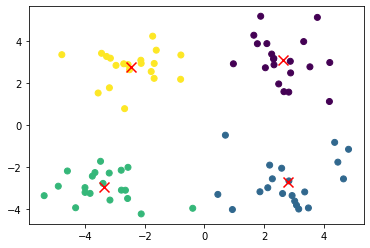

In [93]:
# 绘制数据集
plt.scatter(test_cluster.iloc[:,0],test_cluster.iloc[:,1],c=test_cluster.iloc[:,-1])
# 绘制质心
plt.scatter(test_cent[:,0],test_cent[:,1],color='red',marker='x',s=100)